In [59]:
# importing required libraries
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi

In [60]:
# Load .env environment variables
load_dotenv()

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Check to make sure keys imported correctly, str confirms success
display(type(alpaca_api_key))
display(type(alpaca_secret_key))

str

str

In [61]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [62]:
# Set date range as ISO format
start_date = pd.Timestamp("2020-06-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-04-16", tz="America/New_York").isoformat()

In [63]:
# Create tickers variable, these should be updated as needed
# tickers = ['GME', 'AMC', 'TSLA', 'TLRY', 'SNDL', 'PLTR']
tickers = ['GME']

In [64]:
# Set timeframe to one day ('1D') to get daily data
timeframe = "1D"

In [65]:
# Get current closing prices for the tickers
df_stonks = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df
# print(start_date)

# Display sample data
df_stonks

GME                                    
                             open      high     low   close    volume
time                                                                 
2020-11-20 00:00:00-05:00   12.55   13.4600   12.54   12.71  16233695
2020-11-23 00:00:00-05:00   12.90   14.1200   12.67   13.90  18522123
2020-11-24 00:00:00-05:00   14.23   14.2600   13.30   13.68  13779752
2020-11-25 00:00:00-05:00   13.60   15.2500   13.42   14.75  17250470
2020-11-27 00:00:00-05:00   15.29   16.7400   14.88   16.05  24344622
...                           ...       ...     ...     ...       ...
2021-04-12 00:00:00-04:00  158.10  163.9000  135.01  141.07  16283975
2021-04-13 00:00:00-04:00  141.85  145.3771  132.00  140.80   6412974
2021-04-14 00:00:00-04:00  144.14  174.0900  143.00  166.99  20698092
2021-04-15 00:00:00-04:00  163.07  166.2546  152.80  156.32   7529149
2021-04-16 00:00:00-04:00  156.45  160.1969  151.25  154.68   4816954

[100 rows x 5 columns]

In [66]:
# Extract closing data for all stocks, start with an empty DataFrame
closing_prices_df = pd.DataFrame()

# Get the closing prices of stocks
closing_prices_df["GME"] = df_stonks["GME"]["close"]
# closing_prices_df["AMC"] = df_stonks["AMC"]["close"]
# closing_prices_df["TSLA"] = df_stonks["TSLA"]["close"]
# closing_prices_df["TLRY"] = df_stonks["TLRY"]["close"]
# closing_prices_df["SNDL"] = df_stonks["SNDL"]["close"]
# closing_prices_df["PLTR"] = df_stonks["PLTR"]["close"]

# Drop the time component of the date
closing_prices_df.index = closing_prices_df.index.date

# Display sample data
display(closing_prices_df.head())
display(closing_prices_df.tail())

,GME
2020-11-20,12.71
2020-11-23,13.90
2020-11-24,13.68
2020-11-25,14.75
2020-11-27,16.05


,GME
2021-04-12,141.07
2021-04-13,140.80
2021-04-14,166.99
2021-04-15,156.32
2021-04-16,154.68


<AxesSubplot:title={'center':'Daily Closing Prices for GameStock'}, xlabel='Days', ylabel='Price'>

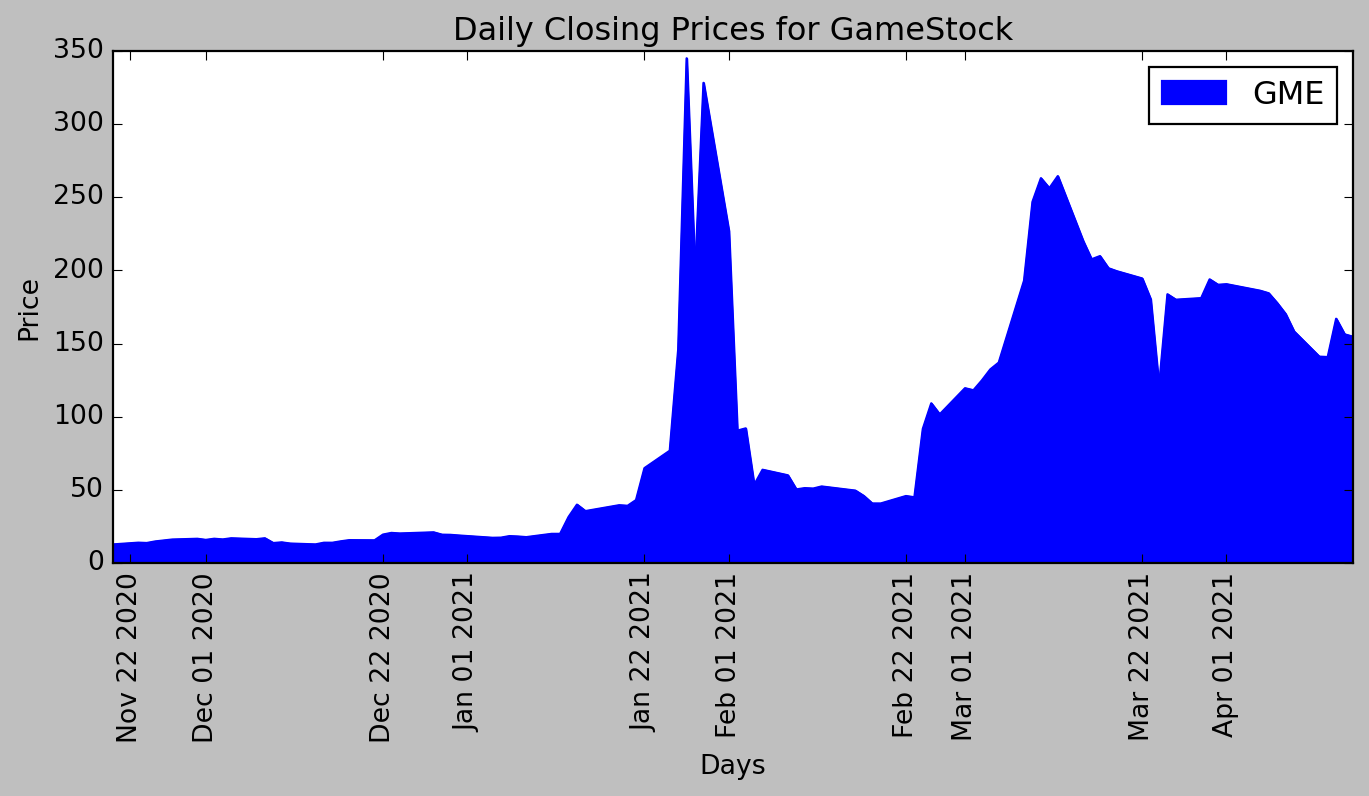

In [125]:
closing_prices_df.plot.area(figsize=(10,4), ylabel="Price", xlabel="Days", color='blue', rot=90, title="Daily Closing Prices for GameStock")

In [68]:
# Extract open data for all stocks, start with an empty DataFrame
opening_prices_df = pd.DataFrame()

# Get the opening prices of stocks
opening_prices_df["GME"] = df_stonks["GME"]["open"]
# opening_prices_df["AMC"] = df_stonks["AMC"]["open"]
# opening_prices_df["TSLA"] = df_stonks["TSLA"]["open"]
# opening_prices_df["TLRY"] = df_stonks["TLRY"]["open"]
# opening_prices_df["SNDL"] = df_stonks["SNDL"]["open"]
# opening_prices_df["PLTR"] = df_stonks["PLTR"]["open"]

# Drop the time component of the date
opening_prices_df.index = opening_prices_df.index.date

# Display sample data
display(closing_prices_df.head())
display(closing_prices_df.tail())

,GME
2020-11-20,12.71
2020-11-23,13.90
2020-11-24,13.68
2020-11-25,14.75
2020-11-27,16.05


,GME
2021-04-12,141.07
2021-04-13,140.80
2021-04-14,166.99
2021-04-15,156.32
2021-04-16,154.68


<AxesSubplot:title={'center':'Daily Opening Prices for GameStock'}, xlabel='Days', ylabel='Price'>

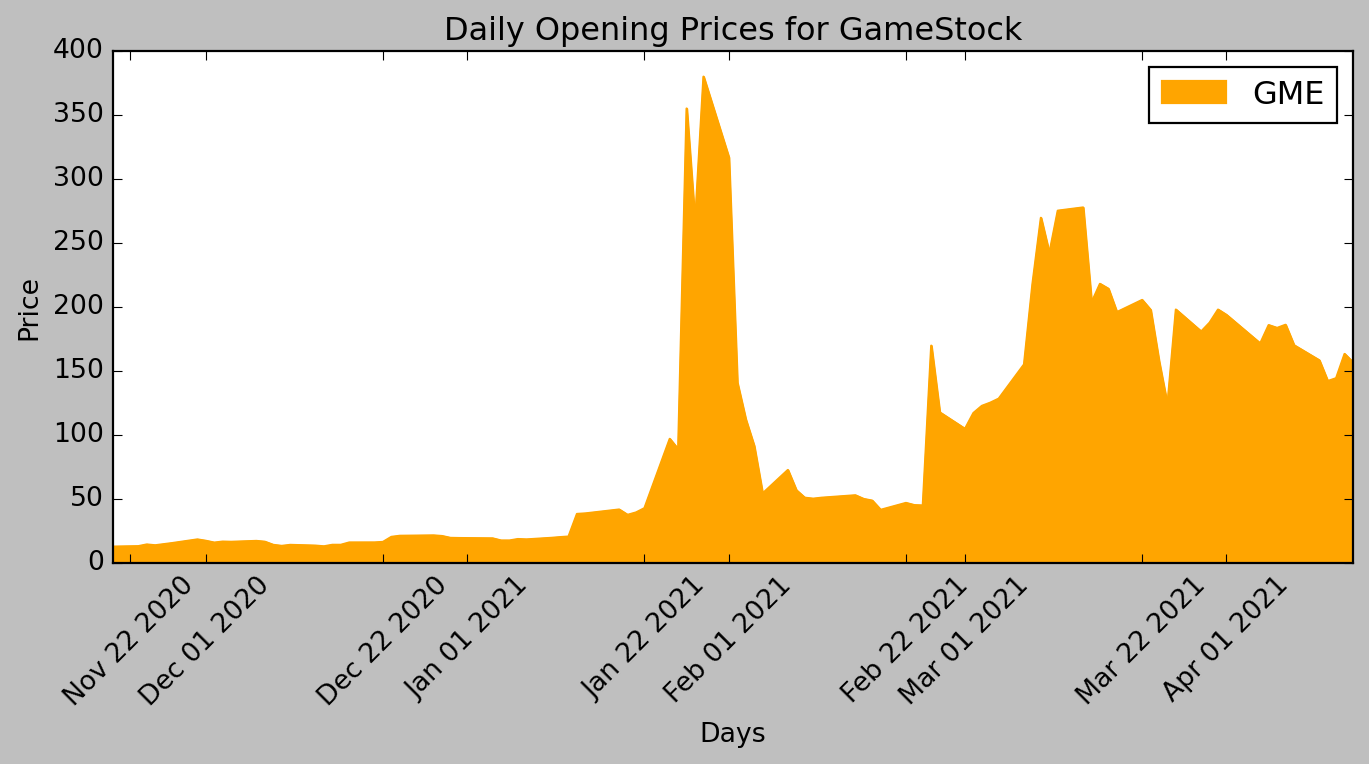

In [126]:
opening_prices_df.plot.area(figsize=(10,4), ylabel="Price", xlabel="Days", color='orange', rot=45, title="Daily Opening Prices for GameStock")

In [69]:
from finta import TA

In [70]:
# Create a GME DF to test technical indicators
gme_df = pd.DataFrame(closing_prices_df['GME'])
display(gme_df.head())
display(gme_df.tail())

,GME
2020-11-20,12.71
2020-11-23,13.90
2020-11-24,13.68
2020-11-25,14.75
2020-11-27,16.05


,GME
2021-04-12,141.07
2021-04-13,140.80
2021-04-14,166.99
2021-04-15,156.32
2021-04-16,154.68


In [71]:
# Create colum for actual returns 
gme_df['actual_returns'] = gme_df.pct_change()

# Review the data
gme_df.head()

,GME,actual_returns
2020-11-20,12.71,NaN
2020-11-23,13.90,0.093627
2020-11-24,13.68,-0.015827
2020-11-25,14.75,0.078216
2020-11-27,16.05,0.088136


In [72]:
# Setting short, medium and long SMAs, starting with the short
gme_df['50_day_sma'] = gme_df['GME'].rolling(window=50).mean()

# Setting the medium SMA
gme_df['150_day_sma'] = gme_df['GME'].rolling(window=150).mean()

# Setting the long SMA
gme_df['200_day_sma'] = gme_df['GME'].rolling(window=200).mean()

In [73]:
gme_df.tail()

,GME,actual_returns,50_day_sma,150_day_sma,200_day_sma
2021-04-12,141.07,-0.108957,144.318970,NaN,NaN
2021-04-13,140.80,-0.001914,140.570170,NaN,NaN
2021-04-14,166.99,0.186009,139.369970,NaN,NaN
2021-04-15,156.32,-0.063896,140.686970,NaN,NaN
2021-04-16,154.68,-0.010491,141.939708,NaN,NaN


In [74]:
# Initialize the new `Signal` column on GME df
gme_df['signal'] = 0.0

In [75]:
# Generate signal to buy GME long
gme_df.loc[(gme_df['GME'] >= gme_df['50_day_sma'])
           & (gme_df['50_day_sma'] >= gme_df['150_day_sma'])
           & (gme_df['150_day_sma'] >= gme_df['200_day_sma']), 
           'signal'] = 1

In [76]:
gme_df.tail()

,GME,actual_returns,50_day_sma,150_day_sma,200_day_sma,signal
2021-04-12,141.07,-0.108957,144.318970,NaN,NaN,0.0
2021-04-13,140.80,-0.001914,140.570170,NaN,NaN,0.0
2021-04-14,166.99,0.186009,139.369970,NaN,NaN,0.0
2021-04-15,156.32,-0.063896,140.686970,NaN,NaN,0.0
2021-04-16,154.68,-0.010491,141.939708,NaN,NaN,0.0


In [77]:
import yfinance as yf

In [78]:
# Set symbol and convert to ticker for yfinance
symbol = 'GME'
ticker = yf.Ticker(symbol)

In [79]:
# Get gme data
data = ticker.history(period='1y',
                     inderval='1d',
                     actions=True,
                     auto_adjust=True)

In [80]:
# preview data
display(data.head())
display(data.tail())

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-04-24,4.78,4.85,4.66,4.77,2236200,0,0
2020-04-27,4.85,5.99,4.81,5.82,7275100,0,0
2020-04-28,5.92,6.04,5.06,5.64,5200200,0,0
2020-04-29,5.83,6.09,5.45,6.04,3369600,0,0
2020-04-30,5.87,5.98,5.64,5.73,2173300,0,0


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-04-19,171.800003,175.199997,162.330002,164.369995,10520200,0,0
2021-04-20,164.139999,164.889999,153.360001,158.529999,4658600,0,0
2021-04-21,158.399994,162.979996,155.919998,158.509995,3812800,0,0
2021-04-22,159.100006,159.100006,146.860001,151.169998,4345800,0,0
2021-04-23,149.000000,153.660004,144.699997,151.179993,4029100,0,0


In [81]:
# extract the close column
gme_df_2 = pd.DataFrame(data['Close'])
gme_df_2.head()

,Close
Date,
2020-04-24,4.77
2020-04-27,5.82
2020-04-28,5.64
2020-04-29,6.04
2020-04-30,5.73


In [82]:
# Setting short, medium and long SMAs, starting with the short
gme_df_2['50_day_sma'] = gme_df_2['Close'].rolling(window=50).mean()

# Setting the medium SMA
gme_df_2['150_day_sma'] = gme_df_2['Close'].rolling(window=150).mean()

# Setting the long SMA
gme_df_2['200_day_sma'] = gme_df_2['Close'].rolling(window=200).mean()

# preview data
gme_df_2.tail()

,Close,50_day_sma,150_day_sma,200_day_sma
Date,,,,
2021-04-19,164.369995,144.4612,67.988000,52.21595
2021-04-20,158.529999,146.3564,68.998800,52.98715
2021-04-21,158.509995,148.3266,70.008267,53.75850
2021-04-22,151.169998,150.3438,70.958200,54.49390
2021-04-23,151.179993,152.3434,71.904733,55.22850


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

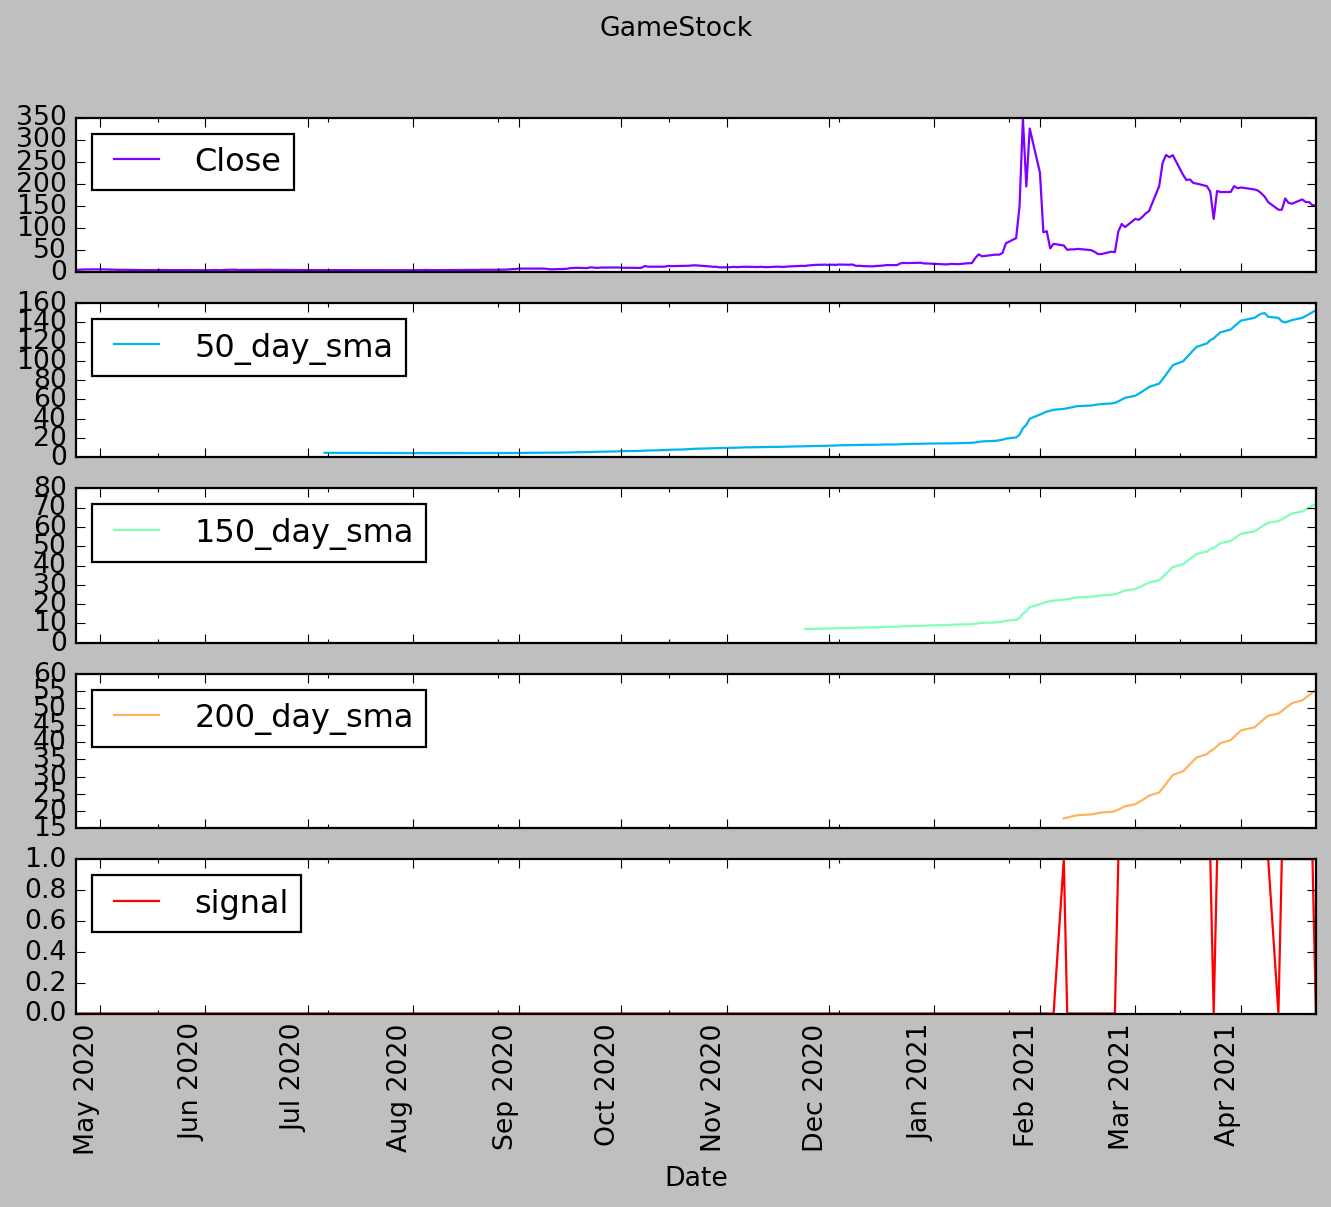

In [127]:
gme_df_2.plot(title="GameStock", subplots=True, figsize=(10,8), rot=90, colormap="rainbow")

In [83]:
# Initialize the new `Signal` column on GME_2 df
gme_df_2['signal'] = 0.0

In [84]:
# Generate signal to buy GME long
gme_df_2.loc[(gme_df_2['Close'] >= gme_df_2['50_day_sma'])
           & (gme_df_2['50_day_sma'] >= gme_df_2['150_day_sma'])
           & (gme_df_2['150_day_sma'] >= gme_df_2['200_day_sma']), 
           'signal'] = 1

In [97]:
gme_df_2

,Close,50_day_sma,150_day_sma,200_day_sma,signal
Date,,,,,
2020-04-24,4.770000,NaN,NaN,NaN,0.0
2020-04-27,5.820000,NaN,NaN,NaN,0.0
2020-04-28,5.640000,NaN,NaN,NaN,0.0
2020-04-29,6.040000,NaN,NaN,NaN,0.0
2020-04-30,5.730000,NaN,NaN,NaN,0.0
...,...,...,...,...,...
2021-04-19,164.369995,144.4612,67.988000,52.21595,1.0
2021-04-20,158.529999,146.3564,68.998800,52.98715,1.0
2021-04-21,158.509995,148.3266,70.008267,53.75850,1.0


In [137]:
# Backtest
from fastquant import backtest, get_stock_data
gme_backtest = get_stock_data("GME", "2020-04-21", "2021-04-21")
backtest('smac', gme_backtest, fast_period=1, slow_period=50)

[*********************100%***********************]  1 of 1 completed
Starting Portfolio Value: 100000.00
2021-04-20, ===Global level arguments===
2021-04-20, init_cash : 100000
2021-04-20, buy_prop : 1
2021-04-20, sell_prop : 1
2021-04-20, commission : 0.0075
2021-04-20, stop_loss : 0
2021-04-20, stop_trail : 0
===Strategy level arguments===
fast_period : 1
slow_period : 50
2021-04-20, Final Portfolio Value: 1759366.6760383868
2021-04-20, Final PnL: 1659366.68
Time used (seconds): 0.13684678077697754
Number of strat runs: 1
Number of strats per run: 1
Strat names: ['smac']
**************************************************
--------------------------------------------------
Strategy Parameters	init_cash:100000	buy_prop:1	sell_prop:1	commission:0.0075	stop_loss:0	stop_trail:0	execution_type:close	channel:	symbol:	allow_short:False	short_max:1.5	add_cash_amount:0	add_cash_freq:M	fast_period:1	slow_period:50
Returns	rtot:2.8675389941250127	ravg:0.011379122992559575	rnorm:16.593666760383865

ImportError: cannot import name 'warnings' from 'matplotlib.dates' (/Users/ayechan/opt/anaconda3/envs/dev/lib/python3.8/site-packages/matplotlib/dates.py)

In [99]:
# Start to build machine learning model by splitting data
X = gme_df_2[['50_day_sma', '150_day_sma', '200_day_sma']].shift().dropna()

# Review the DataFrame
X.head()

,50_day_sma,150_day_sma,200_day_sma
Date,,,
2021-02-09,50.1952,22.235800,17.8526
2021-02-10,50.9064,22.543933,18.0803
2021-02-11,51.6088,22.856867,18.3072
2021-02-12,52.2996,23.169467,18.5345
2021-02-16,53.0316,23.489867,18.7663


In [88]:
# Create dataset to predict
y = gme_df_2['signal']

y[:5]

Date
2020-04-24    0.0
2020-04-27    0.0
2020-04-28    0.0
2020-04-29    0.0
2020-04-30    0.0
Name: signal, dtype: float64

In [89]:
from pandas.tseries.offsets import DateOffset
# set the start of the training
training_start = X.index.min()
training_start

Timestamp('2021-02-09 00:00:00')

In [90]:
# Select the ending period for the training data with an offset of 3 months
training_end = X.index.min() + DateOffset(months=2)

In [91]:
# define the train data
X_train = X.loc[training_start:training_end]
y_train = y.loc[training_start:training_end]

In [92]:
# define the test data
X_test = X.loc[training_end+DateOffset(hours=1):]
y_test = y.loc[training_end+DateOffset(hours=1):]

In [93]:
# Import 
from sklearn.preprocessing import StandardScaler

In [94]:
# Initialize the model
scaler = StandardScaler()

In [95]:
# Fit the model
X_scaler = scaler.fit(X_train)

In [44]:
# Transform the X_train and X_test DataFrames using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)